## Background and Introduction to the Business Problem
Brooklyn has a highest population of all the New York boroughs, it was estimated to be 2,648,771 in 2017. It is also the second by land area, which was estimated as 70.82 sq. miles in 2017 and second in population density, which was estimated as 37,137 persons per sq. mi. in 2017 [Wikipedia]. Overall Brooklyn is mostly residential, which could be a great place to open up a business that would cater to local people, such as convenience store. Brooklyn has 80 neighborhoods. In this project, we will analyze all the neighborhoods in Brooklyn and try to find best locations where one can start a business by opening a convenience store that’ll be in demand. At the same time, we will try to analyze the prices of commercial real estate, to get the most for the buck and see if it’s going to be easier to lease or to purchase premises.
Having a high population density, Brooklyn can be a great place to open up a convenience store. Few things to note though is that because of location and extreme competition real estate prices, be it for rent or for purchase, can get very high. Brooklyn is a very diverse borough, many Brooklyn neighborhoods are ethnic enclaves, based on which, one can adjust to specific needs and interests of surrounding area as well as their own preferences. Therefore, a potential business owner should pick a right niche, either to cater to taste preferences of a specific nationality or to be more general and sell products that are more common to everyone.
To consider all of the aforementioned issues, we will generate a map of Brooklyn, which we will populate with different venues from Foursquare, then cluster it into different districts to look at the interests, prices, competition and other factors of different districts to determine best places to open a convenience store.
This project may be useful to potential entrepreneurs, who are thinking of taking a challenge of opening a business, such as convenience store at such a place as Brooklyn, New York. It also will benefit those, who are interested in exploring more about Brooklyn districts and type of venues it has to offer, including the potential to own or rent a property there.

## Data Description
 *	The data that was used came from the New York .json Dataset, which was downloaded from Coursera website. 
 *	The *.json file contains all of the coordinates for boroughs and districts of New York, from which we remove all the unnecessary coordinates except the ones for Brooklyn that further was used for choropleth map creation. 
 *	The venues were taken from Foursquare API. The data represents coordinates and descriptions of most common venues that belong to all the neighborhoods in Brooklyn. 
 *	We will look at residential and commercial property prices pulling data from Zillow and other retail web pages. Then that data will be clustered into each separate district, and the mean with the median prices for each district will be calculated.
 *	The features that are going to be extracted from the data consist of:
    +	Districts in Brooklyn and real estate prices
    +	Type and frequency of venues

Further, the data will be used to find out which districts have the most potential for opening convenience store, or what kind of convenience stores can be opened there.


In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [2]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [3]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [4]:
neighborhoods_data = newyork_data['features']
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [5]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [6]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [7]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [8]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [9]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [11]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_20bf5a8a14754c9eab678f711c23d2e8 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='sZLSFbXTvhISoSMF45TjtWKEg-vxrNmGxJpX4WPPbYAy',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_20bf5a8a14754c9eab678f711c23d2e8.get_object(Bucket='capstone3-donotdelete-pr-4oo2iaavymxttd',Key='brooklyn1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()


,Median Rent,Median House Price,Median Household Income
0,1809,508000,57980
1,1811,1144000,46137
2,2300,752000,40000
3,3969,1542000,67928
4,1818,975000,35550


In [12]:
brooklyn_data = neighborhoods[neighborhoods['Borough'] == 'Brooklyn'].reset_index(drop=True)
brooklyn_data = pd.concat([brooklyn_data, df_data_2], axis=1)
brooklyn_data.head()

,Borough,Neighborhood,Latitude,Longitude,Median Rent,Median House Price,Median Household Income
0,Brooklyn,Bay Ridge,40.625801,-74.030621,1809,508000,57980
1,Brooklyn,Bensonhurst,40.611009,-73.995180,1811,1144000,46137
2,Brooklyn,Sunset Park,40.645103,-74.010316,2300,752000,40000
3,Brooklyn,Greenpoint,40.730201,-73.954241,3969,1542000,67928
4,Brooklyn,Gravesend,40.595260,-73.973471,1818,975000,35550


In [13]:
address = 'Brooklyn, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Brooklyn are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Brooklyn are 40.6501038, -73.9495823.


In [14]:
# create map of Manhattan using latitude and longitude values
map_brooklyn = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(brooklyn_data['Latitude'], brooklyn_data['Longitude'], brooklyn_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_brooklyn)  
    
map_brooklyn

In [15]:
CLIENT_ID = '4QBFG31TNS0FHUKOVQ2AXJKL4WLVTZKXS2YCNMB3EQPZ3JQV' # your Foursquare ID
CLIENT_SECRET = 'J21MA5GR10SHWXY2DNSUUGXD4VFPIAJIS3FB4EBTHLYQSOAF' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4QBFG31TNS0FHUKOVQ2AXJKL4WLVTZKXS2YCNMB3EQPZ3JQV
CLIENT_SECRET:J21MA5GR10SHWXY2DNSUUGXD4VFPIAJIS3FB4EBTHLYQSOAF


In [16]:
brooklyn_data.loc[0, 'Neighborhood']

'Bay Ridge'

In [17]:
neighborhood_latitude = brooklyn_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = brooklyn_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = brooklyn_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Bay Ridge are 40.625801065010656, -74.03062069353813.


In [18]:
LIMIT = 1000 # limit of number of venues returned by Foursquare API

radius = 500 # define radius



url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url 

'https://api.foursquare.com/v2/venues/explore?&client_id=4QBFG31TNS0FHUKOVQ2AXJKL4WLVTZKXS2YCNMB3EQPZ3JQV&client_secret=J21MA5GR10SHWXY2DNSUUGXD4VFPIAJIS3FB4EBTHLYQSOAF&v=20180605&ll=40.625801065010656,-74.03062069353813&radius=500&limit=1000'

In [19]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5da864c4342adf00385dc245'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Bay Ridge',
  'headerFullLocation': 'Bay Ridge, Brooklyn',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 86,
  'suggestedBounds': {'ne': {'lat': 40.63030106951066,
    'lng': -74.02470273356597},
   'sw': {'lat': 40.62130106051065, 'lng': -74.03653865351028}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b895827f964a5206c2d32e3',
       'name': 'Pilo Arts Day Spa and Salon',
       'location': {'address': '8412 3rd Ave',
        'lat': 40.62474788273414,
        'lng': -74.03059056940135,
        'labeledLatL

In [20]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [21]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Pilo Arts Day Spa and Salon,Spa,40.624748,-74.030591
1,Bagel Boy,Bagel Shop,40.627896,-74.029335
2,Cocoa Grinder,Juice Bar,40.623967,-74.030863
3,Pegasus Cafe,Breakfast Spot,40.623168,-74.031186
4,Ho' Brah Taco Joint,Taco Place,40.622960,-74.031371


In [22]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

86 venues were returned by Foursquare.


In [23]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [24]:
brooklyn_venues = getNearbyVenues(names=brooklyn_data['Neighborhood'],
                                   latitudes=brooklyn_data['Latitude'],
                                   longitudes=brooklyn_data['Longitude']
                                  )


Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker Heights
Gerritsen Beach
Marine Park
Clinton Hill
Sea Gate
Downtown
Boerum Hill
Prospect Lefferts Gardens
Ocean Hill
City Line
Bergen Beach
Midwood
Prospect Park South
Georgetown
East Williamsburg
North Side
South Side
Ocean Parkway
Fort Hamilton
Ditmas Park
Wingate
Rugby
Remsen Village
New Lots
Paerdegat Basin
Mill Basin
Fulton Ferry
Vinegar Hill
Weeksville
Broadway Junction
Dumbo
Homecrest
Highland Park
Madison
Erasmus


In [25]:
print(brooklyn_venues.shape)
brooklyn_venues.head()

(2830, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bay Ridge,40.625801,-74.030621,Pilo Arts Day Spa and Salon,40.624748,-74.030591,Spa
1,Bay Ridge,40.625801,-74.030621,Bagel Boy,40.627896,-74.029335,Bagel Shop
2,Bay Ridge,40.625801,-74.030621,Cocoa Grinder,40.623967,-74.030863,Juice Bar
3,Bay Ridge,40.625801,-74.030621,Pegasus Cafe,40.623168,-74.031186,Breakfast Spot
4,Bay Ridge,40.625801,-74.030621,Ho' Brah Taco Joint,40.622960,-74.031371,Taco Place


In [26]:
print('There are {} uniques categories.'.format(len(brooklyn_venues['Venue Category'].unique())))

There are 290 uniques categories.


In [27]:
# one hot encoding
brooklyn_onehot = pd.get_dummies(brooklyn_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
brooklyn_onehot['Neighborhood'] = brooklyn_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [brooklyn_onehot.columns[-1]] + list(brooklyn_onehot.columns[:-1])
brooklyn_onehot = brooklyn_onehot[fixed_columns]

brooklyn_onehot.head()

,Yoga Studio,Accessories Store,Adult Boutique,Airport Terminal,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cha Chaan Teng,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Fishing Store,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Herbs & Spices Store,History Museum,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundromat,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoors & Recreation,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Piercing Parlor,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Club,Roller Rink,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Street Fair,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Taxi,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tibetan Restaurant,Tiki Bar,Toy / Game Store,Trail,Turkish Rest

In [28]:
brooklyn_grouped = brooklyn_onehot.groupby('Neighborhood').mean().reset_index()
brooklyn_grouped

,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,Airport Terminal,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cha Chaan Teng,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Fishing Store,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Herbs & Spices Store,History Museum,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundromat,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoors & Recreation,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Piercing Parlor,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Club,Roller Rink,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Street Fair,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Taxi,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tibetan Restaurant,Tiki Bar,Toy / Game Store,Trail,Turkish Rest

In [29]:
brooklyn_grouped.shape

(70, 290)

In [30]:
num_top_venues = 5

for hood in brooklyn_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = brooklyn_grouped[brooklyn_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bath Beach----
                venue  freq
0  Chinese Restaurant  0.10
1            Pharmacy  0.06
2         Pizza Place  0.06
3    Sushi Restaurant  0.04
4     Bubble Tea Shop  0.04


----Bay Ridge----
                 venue  freq
0   Italian Restaurant  0.07
1                  Spa  0.07
2          Pizza Place  0.03
3  American Restaurant  0.03
4             Pharmacy  0.03


----Bedford Stuyvesant----
           venue  freq
0           Café  0.08
1    Coffee Shop  0.08
2            Bar  0.08
3    Pizza Place  0.08
4  Deli / Bodega  0.08


----Bensonhurst----
              venue  freq
0        Donut Shop  0.07
1  Sushi Restaurant  0.07
2     Grocery Store  0.07
3    Ice Cream Shop  0.07
4               Bar  0.04


----Bergen Beach----
                venue  freq
0     Harbor / Marina  0.33
1      Baseball Field  0.17
2  Athletics & Sports  0.17
3          Donut Shop  0.17
4          Playground  0.17


----Boerum Hill----
                    venue  freq
0             Coffee Shop  0.

In [43]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [44]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = brooklyn_grouped['Neighborhood']

for ind in np.arange(brooklyn_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(brooklyn_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bath Beach,Chinese Restaurant,Pharmacy,Pizza Place,Kids Store,Fast Food Restaurant,Donut Shop,Sushi Restaurant,Bubble Tea Shop,Italian Restaurant,Clothing Store
1,Bay Ridge,Italian Restaurant,Spa,Thai Restaurant,Bar,Greek Restaurant,American Restaurant,Pharmacy,Pizza Place,Diner,Sushi Restaurant
2,Bedford Stuyvesant,Bar,Pizza Place,Deli / Bodega,Coffee Shop,Café,Park,New American Restaurant,Gourmet Shop,Cocktail Bar,Boutique
3,Bensonhurst,Donut Shop,Sushi Restaurant,Ice Cream Shop,Grocery Store,Spa,Chinese Restaurant,Noodle House,Bridal Shop,Bar,Bakery
4,Bergen Beach,Harbor / Marina,Donut Shop,Playground,Athletics & Sports,Baseball Field,Food & Drink Shop,Food,Flower Shop,Flea Market,Fishing Store
5,Boerum Hill,Coffee Shop,Dance Studio,Furniture / Home Store,Bar,Sandwich Place,French Restaurant,Kids Store,Middle Eastern Restaurant,Martial Arts Dojo,Bakery
6,Borough Park,Bank,Pizza Place,Deli / Bodega,Fast Food Restaurant,Pharmacy,Hotel,Coffee Shop,Men's Store,Café,Bike Shop
7,Brighton Beach,Beach,Eastern European Restaurant,Restaurant,Russian Restaurant,Fast Food Restaurant,Gourmet Shop,Mobile Phone Shop,Bank,Sushi Restaurant,Taco Place
8,Broadway Junction,Donut Shop,Fried Chicken Joint,Diner,Sandwich Place,Grocery Store,Gas Station,Metro Station,Seafood Restaurant,Ice Cream Shop,Cosmetics Shop
9,Brooklyn Heights,Yoga Studio,Park,Italian Restaurant,Gym,Bakery,Deli / Bodega,Plaza,Cosmetics Shop,Pizza Place,Gym / Fitness Center


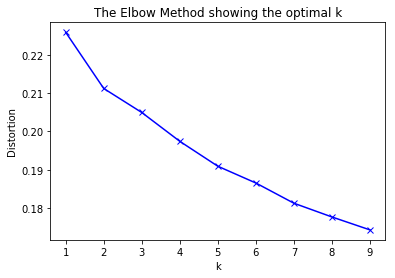

In [415]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
brooklyn_grouped_clustering = brooklyn_grouped.drop('Neighborhood', 1)
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(brooklyn_grouped_clustering)
    kmeanModel.fit(brooklyn_grouped_clustering)
    distortions.append(sum(np.min(cdist(brooklyn_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / brooklyn_grouped_clustering.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

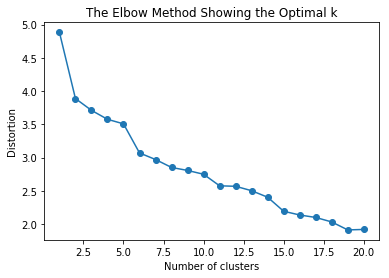

In [37]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
brooklyn_grouped_clustering = brooklyn_grouped.drop('Neighborhood', 1)
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 21):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(brooklyn_grouped_clustering)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 21), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method Showing the Optimal k')
plt.show()

In [45]:
# set number of clusters
kclusters = 9

brooklyn_grouped_clustering = brooklyn_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(brooklyn_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 5, 5, 1, 8, 5, 4, 1, 4, 5], dtype=int32)

In [46]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

brooklyn_merged = brooklyn_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
brooklyn_merged = brooklyn_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

brooklyn_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Median Rent,Median House Price,Median Household Income,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Brooklyn,Bay Ridge,40.625801,-74.030621,1809,508000,57980,5,Italian Restaurant,Spa,Thai Restaurant,Bar,Greek Restaurant,American Restaurant,Pharmacy,Pizza Place,Diner,Sushi Restaurant
1,Brooklyn,Bensonhurst,40.611009,-73.995180,1811,1144000,46137,1,Donut Shop,Sushi Restaurant,Ice Cream Shop,Grocery Store,Spa,Chinese Restaurant,Noodle House,Bridal Shop,Bar,Bakery
2,Brooklyn,Sunset Park,40.645103,-74.010316,2300,752000,40000,1,Pizza Place,Mexican Restaurant,Latin American Restaurant,Bank,Bakery,Pharmacy,Mobile Phone Shop,Gym,Bagel Shop,Creperie
3,Brooklyn,Greenpoint,40.730201,-73.954241,3969,1542000,67928,5,Bar,Pizza Place,Coffee Shop,Cocktail Bar,Furniture / Home Store,French Restaurant,Mexican Restaurant,Record Shop,Café,Yoga Studio
4,Brooklyn,Gravesend,40.595260,-73.973471,1818,975000,35550,1,Pizza Place,Bus Station,Lounge,Italian Restaurant,Bakery,Metro Station,Sporting Goods Shop,Baseball Field,Martial Arts Dojo,Furniture / Home Store


In [479]:
#brooklyn_merged=brooklyn_merged.drop(51)
#brooklyn_merged

In [47]:
# create map

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
brooklyn_merged['Cluster Labels'] = brooklyn_merged['Cluster Labels'].astype(int)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(brooklyn_merged['Latitude'], brooklyn_merged['Longitude'], brooklyn_merged['Neighborhood'], brooklyn_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [48]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 0, brooklyn_merged.columns[[1] + list(range(4, brooklyn_merged.shape[1]))]]

,Neighborhood,Median Rent,Median House Price,Median Household Income,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
68,Madison,1655,660000,55840,0,Deli / Bodega,Bagel Shop,Pizza Place,Candy Store,Pilates Studio,Bus Station,Italian Restaurant,Dessert Shop,Flower Shop,Food


In [49]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 1, brooklyn_merged.columns[[1] + list(range(4, brooklyn_merged.shape[1]))]]

,Neighborhood,Median Rent,Median House Price,Median Household Income,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Bensonhurst,1811,1144000,46137,1,Donut Shop,Sushi Restaurant,Ice Cream Shop,Grocery Store,Spa,Chinese Restaurant,Noodle House,Bridal Shop,Bar,Bakery
2,Sunset Park,2300,752000,40000,1,Pizza Place,Mexican Restaurant,Latin American Restaurant,Bank,Bakery,Pharmacy,Mobile Phone Shop,Gym,Bagel Shop,Creperie
4,Gravesend,1818,975000,35550,1,Pizza Place,Bus Station,Lounge,Italian Restaurant,Bakery,Metro Station,Sporting Goods Shop,Baseball Field,Martial Arts Dojo,Furniture / Home Store
5,Brighton Beach,2169,660000,30872,1,Beach,Eastern European Restaurant,Restaurant,Russian Restaurant,Fast Food Restaurant,Gourmet Shop,Mobile Phone Shop,Bank,Sushi Restaurant,Taco Place
7,Manhattan Terrace,1314,660000,52782,1,Pizza Place,Ice Cream Shop,Donut Shop,Bagel Shop,Cosmetics Shop,Convenience Store,Coffee Shop,Chinese Restaurant,Organic Grocery,Bus Station
8,Flatbush,1983,600000,45332,1,Juice Bar,Deli / Bodega,Caribbean Restaurant,Coffee Shop,Mexican Restaurant,Plaza,Sandwich Place,Chinese Restaurant,Bank,Bakery
9,Crown Heights,2513,863000,39703,1,Pizza Place,Museum,Café,Bagel Shop,Playground,Metro Station,Supermarket,Sushi Restaurant,Candy Store,Farmers Market
11,Kensington,1835,660000,45483,1,Grocery Store,Sandwich Place,Thai Restaurant,Pizza Place,Ice Cream Shop,Pharmacy,Donut Shop,Furniture / Home Store,Fried Chicken Joint,Lingerie Store
14,Brownsville,2212,562500,52782,1,Park,Restaurant,Playground,Performing Arts Venue,Plaza,Moving Target,Fried Chicken Joint,Farmers Market,Taxi,Caribbean Restaurant
31,Manhattan Beach,2169,660000,51314,1,Bus Stop,Ice Cream Shop,Harbor / Marina,Food,Beach,Playground,Pizza Place,Sandwich Place,Café,Farm


In [50]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 2, brooklyn_merged.columns[[1] + list(range(4, brooklyn_merged.shape[1]))]]

,Neighborhood,Median Rent,Median House Price,Median Household Income,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30,Mill Island,1314,660000,52782,2,Pool,Women's Store,Fish Market,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fishing Store


In [51]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] ==3, brooklyn_merged.columns[[1] + list(range(4, brooklyn_merged.shape[1]))]]

,Neighborhood,Median Rent,Median House Price,Median Household Income,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
27,Starrett City,1314,660000,52782,3,Pharmacy,Moving Target,American Restaurant,Pizza Place,Supermarket,Caribbean Restaurant,Donut Shop,Fish & Chips Shop,Farm,Farmers Market


In [52]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 4, brooklyn_merged.columns[[1] + list(range(4, brooklyn_merged.shape[1]))]]

,Neighborhood,Median Rent,Median House Price,Median Household Income,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,East Flatbush,1671,695000,50889,4,Print Shop,Pharmacy,Moving Target,Supermarket,Fast Food Restaurant,Caribbean Restaurant,Food & Drink Shop,Park,Hardware Store,Food
25,Cypress Hills,2436,660000,40432,4,Fried Chicken Joint,Latin American Restaurant,Pizza Place,Donut Shop,Spanish Restaurant,Ice Cream Shop,Fast Food Restaurant,Baseball Field,Supermarket,South American Restaurant
26,East New York,2876,620000,32973,4,Fast Food Restaurant,Deli / Bodega,Spanish Restaurant,Event Service,Pizza Place,Gym,Chinese Restaurant,Metro Station,Caribbean Restaurant,Field
29,Flatlands,1535,510000,64519,4,Pharmacy,Fried Chicken Joint,Fast Food Restaurant,Caribbean Restaurant,Bar,Park,Deli / Bodega,Lounge,Discount Store,Video Store
32,Coney Island,2341,440000,52782,4,Pharmacy,Caribbean Restaurant,Baseball Stadium,Brewery,Gourmet Shop,Cosmetics Shop,Park,Skating Rink,Music Venue,Food Court
34,Borough Park,1862,1250000,35754,4,Bank,Pizza Place,Deli / Bodega,Fast Food Restaurant,Pharmacy,Hotel,Coffee Shop,Men's Store,Café,Bike Shop
47,Prospect Park South,1972,660000,52782,4,Caribbean Restaurant,Pharmacy,Fast Food Restaurant,Grocery Store,Pizza Place,Mexican Restaurant,Donut Shop,Kids Store,Fried Chicken Joint,Mobile Phone Shop
55,Wingate,3075,660000,52782,4,Fast Food Restaurant,Liquor Store,Field,Gym / Fitness Center,BBQ Joint,Fish & Chips Shop,Donut Shop,Pharmacy,Juice Bar,Bus Station
56,Rugby,1900,660000,44027,4,Bank,Caribbean Restaurant,Supermarket,Women's Store,Diner,Pharmacy,Coffee Shop,Restaurant,Chinese Restaurant,Sandwich Place
57,Remsen Village,1900,660000,44027,4,Caribbean Restaurant,Fast Food Restaurant,Pharmacy,Sandwich Place,Fish Market,Coffee Shop,Breakfast Spot,Supermarket,Fried Chicken Joint,Deli / Bodega


In [53]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 5, brooklyn_merged.columns[[1] + list(range(4, brooklyn_merged.shape[1]))]]

,Neighborhood,Median Rent,Median House Price,Median Household Income,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bay Ridge,1809,508000,57980,5,Italian Restaurant,Spa,Thai Restaurant,Bar,Greek Restaurant,American Restaurant,Pharmacy,Pizza Place,Diner,Sushi Restaurant
3,Greenpoint,3969,1542000,67928,5,Bar,Pizza Place,Coffee Shop,Cocktail Bar,Furniture / Home Store,French Restaurant,Mexican Restaurant,Record Shop,Café,Yoga Studio
6,Sheepshead Bay,2101,600000,51314,5,Turkish Restaurant,Dessert Shop,Sandwich Place,Yoga Studio,Department Store,Café,Russian Restaurant,Restaurant,Hotel,Pizza Place
12,Windsor Terrace,2529,742000,82297,5,Deli / Bodega,Grocery Store,Plaza,Park,Café,Diner,American Restaurant,Bagel Shop,Chinese Restaurant,Beer Store
13,Prospect Heights,3342,660000,84323,5,Bar,Mexican Restaurant,Wine Shop,Gourmet Shop,Bakery,Thai Restaurant,Cocktail Bar,Yoga Studio,Café,Jewelry Store
15,Williamsburg,3317,1021000,21502,5,Coffee Shop,Bar,Pizza Place,Bagel Shop,Yoga Studio,Food Truck,Tapas Restaurant,Taco Place,Steakhouse,Liquor Store
16,Bushwick,3088,880000,39700,5,Bar,Deli / Bodega,Coffee Shop,Mexican Restaurant,Pizza Place,Discount Store,Bakery,Thrift / Vintage Store,Café,Sandwich Place
17,Bedford Stuyvesant,3025,936000,37343,5,Bar,Pizza Place,Deli / Bodega,Coffee Shop,Café,Park,New American Restaurant,Gourmet Shop,Cocktail Bar,Boutique
18,Brooklyn Heights,3553,660000,105398,5,Yoga Studio,Park,Italian Restaurant,Gym,Bakery,Deli / Bodega,Plaza,Cosmetics Shop,Pizza Place,Gym / Fitness Center
19,Cobble Hill,3576,660000,105398,5,Deli / Bodega,Playground,Bar,Pizza Place,Coffee Shop,Ice Cream Shop,Italian Restaurant,Cocktail Bar,Yoga Studio,French Restaurant


In [54]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 6, brooklyn_merged.columns[[1] + list(range(4, brooklyn_merged.shape[1]))]]

,Neighborhood,Median Rent,Median House Price,Median Household Income,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
39,Sea Gate,1314,440000,52782,6,Home Service,Clothing Store,Spa,Beach,Optical Shop,Bus Station,Women's Store,Farmers Market,Fast Food Restaurant,Field


In [55]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 7, brooklyn_merged.columns[[1] + list(range(4, brooklyn_merged.shape[1]))]]

,Neighborhood,Median Rent,Median House Price,Median Household Income,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,Canarsie,2038,562500,60766,7,Gym,Caribbean Restaurant,Chinese Restaurant,Asian Restaurant,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field
59,Paerdegat Basin,1314,660000,52782,7,Gym,Chinese Restaurant,Food,Harbor / Marina,Asian Restaurant,Field,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant


In [56]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 8, brooklyn_merged.columns[[1] + list(range(4, brooklyn_merged.shape[1]))]]

,Neighborhood,Median Rent,Median House Price,Median Household Income,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
45,Bergen Beach,1735,650000,72158,8,Harbor / Marina,Donut Shop,Playground,Athletics & Sports,Baseball Field,Food & Drink Shop,Food,Flower Shop,Flea Market,Fishing Store


In [57]:
from collections import Counter 
Counter(sorted(brooklyn_merged['1st Most Common Venue']))

Counter({'Art Gallery': 1,
         'Bank': 4,
         'Bar': 7,
         'Beach': 1,
         'Burger Joint': 2,
         'Bus Stop': 1,
         'Café': 1,
         'Caribbean Restaurant': 3,
         'Chinese Restaurant': 1,
         'Coffee Shop': 4,
         'Deli / Bodega': 6,
         'Discount Store': 1,
         'Donut Shop': 3,
         'Fast Food Restaurant': 2,
         'Food Truck': 1,
         'Fried Chicken Joint': 1,
         'Furniture / Home Store': 1,
         'Grocery Store': 1,
         'Gym': 2,
         'Harbor / Marina': 1,
         'Home Service': 1,
         'Ice Cream Shop': 1,
         'Italian Restaurant': 3,
         'Juice Bar': 1,
         'Liquor Store': 1,
         'Park': 2,
         'Pharmacy': 3,
         'Pizza Place': 8,
         'Playground': 1,
         'Pool': 1,
         'Print Shop': 1,
         'School': 1,
         'Turkish Restaurant': 1,
         'Yoga Studio': 1})

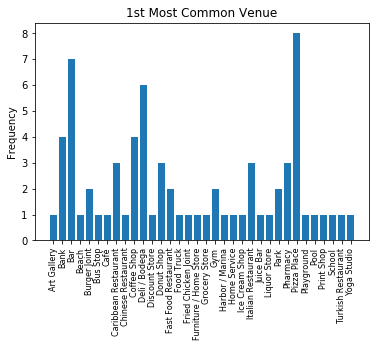

In [60]:
nom=[1,4,7,1,2,1,1,3,1,4,6,1,3,2,1,1,1,1,2,1,1,1,3,1,1,2,3,8,1,1,1,1,1,1]
import matplotlib.pyplot as plt
import numpy as np
y_pos = np.arange(len(np.unique(brooklyn_merged['1st Most Common Venue']))) 
# Create bars
plt.bar(y_pos, nom)
plt.title('1st Most Common Venue')
plt.ylabel('Frequency', fontsize=10)
# Create names on the x-axis
plt.xticks(y_pos, np.unique(brooklyn_merged['1st Most Common Venue']),fontsize=8, rotation=90)
# Show graphic
plt.show()

In [61]:
from collections import Counter 
Counter(sorted(brooklyn_merged['2nd Most Common Venue']))

Counter({'American Restaurant': 2,
         'Art Gallery': 1,
         'Athletics & Sports': 1,
         'Bagel Shop': 1,
         'Bakery': 2,
         'Bar': 2,
         'Bus Station': 1,
         'Bus Stop': 1,
         'Caribbean Restaurant': 3,
         'Chinese Restaurant': 1,
         'Clothing Store': 1,
         'Cosmetics Shop': 1,
         'Dance Studio': 1,
         'Deli / Bodega': 4,
         'Dessert Shop': 1,
         'Donut Shop': 2,
         'Eastern European Restaurant': 1,
         'Fast Food Restaurant': 1,
         'Fried Chicken Joint': 2,
         'Golf Course': 1,
         'Grocery Store': 2,
         'Ice Cream Shop': 3,
         'Italian Restaurant': 1,
         'Jewish Restaurant': 1,
         'Latin American Restaurant': 1,
         'Liquor Store': 1,
         'Mexican Restaurant': 2,
         'Moving Target': 1,
         'Museum': 1,
         'Park': 2,
         'Pharmacy': 4,
         'Pizza Place': 10,
         'Playground': 1,
         'Restaurant': 1,


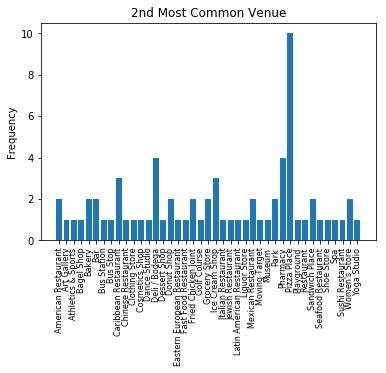

In [62]:
nom2 = [2,1,1,1,2,2,1,1,3,1,1,1,1,4,1,2,1,1,2,1,2,3,1,1,1,1,2,1,1,2,4,10,1,1,2,1,1,1,1,2,1]
y_pos = np.arange(len(np.unique(brooklyn_merged['2nd Most Common Venue']))) 
# Create bars
plt.bar(y_pos, nom2)
plt.title('2nd Most Common Venue')
plt.ylabel('Frequency', fontsize=10)
# Create names on the x-axis
plt.xticks(y_pos, np.unique(brooklyn_merged['2nd Most Common Venue']),fontsize=8, rotation=90)
# Show graphic
plt.show()

In [63]:
from collections import Counter 
Counter(sorted(brooklyn_merged['3rd Most Common Venue']))

Counter({'American Restaurant': 1,
         'Bar': 2,
         'Baseball Stadium': 1,
         'Burger Joint': 1,
         'Café': 3,
         'Caribbean Restaurant': 1,
         'Chinese Restaurant': 2,
         'Coffee Shop': 5,
         'Deli / Bodega': 5,
         'Diner': 1,
         'Donut Shop': 2,
         'Fast Food Restaurant': 2,
         'Field': 1,
         'Fish Market': 1,
         'Food': 1,
         'Fried Chicken Joint': 1,
         'Furniture / Home Store': 1,
         'Gym / Fitness Center': 2,
         'Harbor / Marina': 1,
         'Ice Cream Shop': 2,
         'Italian Restaurant': 2,
         'Latin American Restaurant': 1,
         'Liquor Store': 1,
         'Lounge': 1,
         'Mexican Restaurant': 1,
         'Moving Target': 1,
         'Park': 1,
         'Pharmacy': 2,
         'Pizza Place': 5,
         'Playground': 2,
         'Plaza': 1,
         'Restaurant': 1,
         'Sandwich Place': 2,
         'Scenic Lookout': 1,
         'Southern / Soul F

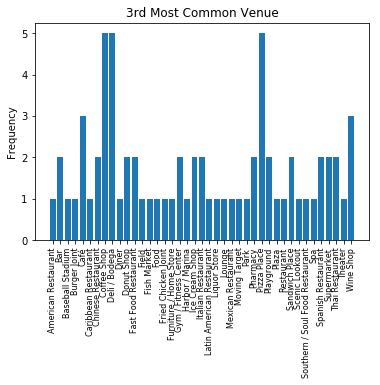

In [64]:
nom3 = [1,2,1,1,3,1,2,5,5,1,2,2,1,1,1,1,1,2,1,2,2,1,1,1,1,1,1,2,5,2,1,1,2,1,1,1,2,2,2,1,3]
y_pos = np.arange(len(np.unique(brooklyn_merged['3rd Most Common Venue']))) 
# Create bars
plt.bar(y_pos, nom3)
plt.title('3rd Most Common Venue')
plt.ylabel('Frequency', fontsize=10)
# Create names on the x-axis
plt.xticks(y_pos, np.unique(brooklyn_merged['3rd Most Common Venue']),fontsize=8, rotation=90)
# Show graphic
plt.show()

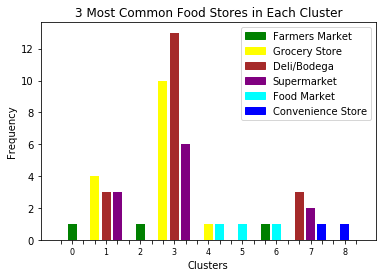

In [545]:
nom4 = [0,1,0,4,3,3,0,1,0,10,13,6,0,1,1,0,1,0,1,1,0,3,2,1,0,1,0]
num_clust = range(27)
names=['','0','','','1','','','2','','','3','','','4','','','5','','','6','','',
       '7','','','8','']
y_pos = np.arange(len(num_clust)) 
# Create bars
plt.bar(y_pos, nom4, color=['black','green','black','yellow','brown','purple','black','green','black','yellow','brown','purple','black','yellow','cyan','black','cyan','black',
       'green','cyan','black','brown','purple','blue','black','blue','black'])
plt.title('3 Most Common Food Stores in Each Cluster')
plt.ylabel('Frequency', fontsize=10)
plt.xlabel('Clusters', fontsize=10)
# Create names on the x-axis
plt.xticks(y_pos, names,fontsize=8, rotation=0)

import matplotlib.patches as mpatches
green_patch = mpatches.Patch(color='green', label='Farmers Market')
yellow_patch = mpatches.Patch(color='yellow', label='Grocery Store')
brown_patch = mpatches.Patch(color='brown', label='Deli/Bodega')
purple_patch = mpatches.Patch(color='purple', label='Supermarket')
cyan_patch = mpatches.Patch(color='cyan', label='Food Market')
blue_patch = mpatches.Patch(color='blue', label='Convenience Store')

plt.legend(handles=[green_patch, yellow_patch, brown_patch, purple_patch, cyan_patch, blue_patch])
# Show graphic
plt.show()

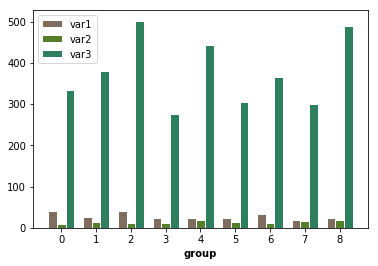

In [546]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [40.17, 25.93, 40.17, 23.15, 24.29, 23.66, 33.87, 19.49, 24.67]
bars2 = [8.34, 14.62, 12.5, 11.88, 18.21, 12.86, 10.77, 15.46, 19.8]
bars3 = [334.86, 379.13, 502.28, 275.08, 442.32, 304.29, 364.71, 301.26, 488.42]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='var1')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='var2')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['0', '1', '2', '3', '4', '5', '6', '7', '8'])
 
# Create legend & Show graphic
plt.legend()
plt.show()


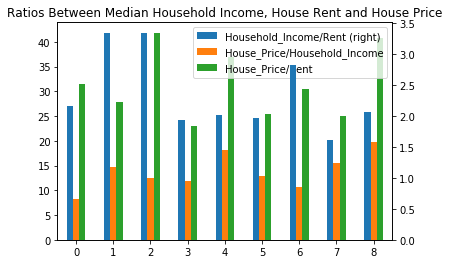

In [82]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO

s = StringIO("""     Household_Income/Rent      House_Price/Household_Income     House_Price/Rent
0     2.16   8.34   31.59
1     3.35   14.62  27.9
2     3.35   12.50  41.86
3     1.93   11.88  22.92
4     2.02   18.21  36.86
5     1.97   12.86  25.36
6     2.82   10.77  30.39
7     1.62   15.46  25.11
8     2.06   19.80  40.7""")

df = pd.read_csv(s, index_col=0, delimiter=' ', skipinitialspace=True)


_ = df.plot( kind= 'bar' , secondary_y= 'Household_Income/Rent' , rot= 0 )

plt.xlabel('Clusters', fontweight='bold')
plt.title('Ratios Between Median Household Income, House Rent and House Price')


plt.show()

In [76]:
np.unique(brooklyn_venues['Neighborhood'], return_counts=True)

(array(['Bath Beach', 'Bay Ridge', 'Bedford Stuyvesant', 'Bensonhurst',
        'Bergen Beach', 'Boerum Hill', 'Borough Park', 'Brighton Beach',
        'Broadway Junction', 'Brooklyn Heights', 'Brownsville', 'Bushwick',
        'Canarsie', 'Carroll Gardens', 'City Line', 'Clinton Hill',
        'Cobble Hill', 'Coney Island', 'Crown Heights', 'Cypress Hills',
        'Ditmas Park', 'Downtown', 'Dumbo', 'Dyker Heights',
        'East Flatbush', 'East New York', 'East Williamsburg', 'Erasmus',
        'Flatbush', 'Flatlands', 'Fort Greene', 'Fort Hamilton',
        'Fulton Ferry', 'Georgetown', 'Gerritsen Beach', 'Gowanus',
        'Gravesend', 'Greenpoint', 'Highland Park', 'Homecrest',
        'Kensington', 'Madison', 'Manhattan Beach', 'Manhattan Terrace',
        'Marine Park', 'Midwood', 'Mill Basin', 'Mill Island', 'New Lots',
        'North Side', 'Ocean Hill', 'Ocean Parkway', 'Paerdegat Basin',
        'Park Slope', 'Prospect Heights', 'Prospect Lefferts Gardens',
        'Prosp

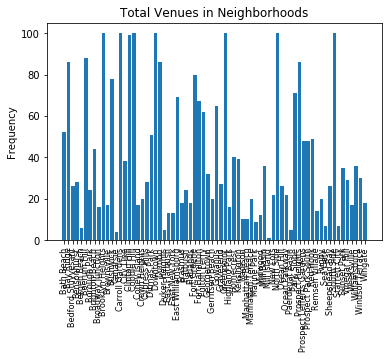

In [78]:
vens = [52,86,26,28,6,88,24,44,16,100,17,78,4,100,38,99,100,17,20,28,51,100,86,5,13,13,69,18,24,18,80,67,62,32,20,65,
        27,100,16,40,39,10,10,20,9,12,36,1,22,100,26,22,5,71,86,48,48,49,14,20,7,26,100,7,35,29,17,36,30,18]
y_pos = np.arange(len(np.unique(brooklyn_venues['Neighborhood']))) 
# Create bars
plt.bar(y_pos, vens)
plt.title('Total Venues in Neighborhoods')
plt.ylabel('Frequency', fontsize=10)
# Create names on the x-axis
plt.xticks(y_pos, np.unique(brooklyn_venues['Neighborhood']),fontsize=8, rotation=90)
# Show graphic
plt.show()

In [89]:
bbb=brooklyn_merged
bbb.drop(['Borough', 'Longitude', 'Latitude'], axis=1)


,Neighborhood,Median Rent,Median House Price,Median Household Income,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bay Ridge,1809,508000,57980,5,Italian Restaurant,Spa,Thai Restaurant,Bar,Greek Restaurant,American Restaurant,Pharmacy,Pizza Place,Diner,Sushi Restaurant
1,Bensonhurst,1811,1144000,46137,1,Donut Shop,Sushi Restaurant,Ice Cream Shop,Grocery Store,Spa,Chinese Restaurant,Noodle House,Bridal Shop,Bar,Bakery
2,Sunset Park,2300,752000,40000,1,Pizza Place,Mexican Restaurant,Latin American Restaurant,Bank,Bakery,Pharmacy,Mobile Phone Shop,Gym,Bagel Shop,Creperie
3,Greenpoint,3969,1542000,67928,5,Bar,Pizza Place,Coffee Shop,Cocktail Bar,Furniture / Home Store,French Restaurant,Mexican Restaurant,Record Shop,Café,Yoga Studio
4,Gravesend,1818,975000,35550,1,Pizza Place,Bus Station,Lounge,Italian Restaurant,Bakery,Metro Station,Sporting Goods Shop,Baseball Field,Martial Arts Dojo,Furniture / Home Store
5,Brighton Beach,2169,660000,30872,1,Beach,Eastern European Restaurant,Restaurant,Russian Restaurant,Fast Food Restaurant,Gourmet Shop,Mobile Phone Shop,Bank,Sushi Restaurant,Taco Place
6,Sheepshead Bay,2101,600000,51314,5,Turkish Restaurant,Dessert Shop,Sandwich Place,Yoga Studio,Department Store,Café,Russian Restaurant,Restaurant,Hotel,Pizza Place
7,Manhattan Terrace,1314,660000,52782,1,Pizza Place,Ice Cream Shop,Donut Shop,Bagel Shop,Cosmetics Shop,Convenience Store,Coffee Shop,Chinese Restaurant,Organic Grocery,Bus Station
8,Flatbush,1983,600000,45332,1,Juice Bar,Deli / Bodega,Caribbean Restaurant,Coffee Shop,Mexican Restaurant,Plaza,Sandwich Place,Chinese Restaurant,Bank,Bakery
9,Crown Heights,2513,863000,39703,1,Pizza Place,Museum,Café,Bagel Shop,Playground,Metro Station,Supermarket,Sushi Restaurant,Candy Store,Farmers Market
